# A/B-тестирование

**Описание проекта.**
Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

`/datasets/hypothesis.csv` - файл с гипотезами.

`/datasets/orders.csv` - файл с заказали пользователей

`/datasets/visitors.csv` - файл с визитами пользователей

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt

## Загрузка данных и подготовка к анализу

In [51]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


У каждой гипотезы 4 параметра:
- `Reach` - размах наших изменений от 1 до 10.
- `Impact` - влияние на пользователей от 1 до 10.
- `Confidence` - шкала уверенности в оценках параметров.
- `Efforts` - оценка сложности и трудозатрат.

Приоритезируем гитотезы фреймворками `ICE` и `RICE`.

In [4]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [5]:
hypothesis.sort_values('ICE',ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


In [6]:
hypothesis.sort_values('RICE',ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


В `RICE` есть дополнительный параметр `Reach`, который по сути умножает итоговый `ICE`-рейтинг. Поэтому гипотезы с максимальными `Reach` сразу оказываются вверху `RICE`- рейтинга приоритета.

In [7]:
pd.set_option('display.max_colwidth', 150)
hypothesis.sort_values('RICE',ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


In [8]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
orders = orders.rename(columns={'transactionId':'transaction_id','visitorId':'visitor_id'}) # предобработаем и проверим на дудли
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.duplicated().sum() # проверим на дубликаты

0

In [50]:
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [11]:
visitors.duplicated().sum()

0

In [12]:
xxx = orders.groupby('visitor_id')['group'].nunique().reset_index() # айдишники в обоих группах
xxx[xxx['group'] == 2].head()

,visitor_id,group
2,8300375,2
44,199603092,2
51,232979603,2
55,237748145,2
66,276558944,2


In [13]:
len(xxx[xxx['group'] == 2]) # ну их так много

58

## Анализ А/В-теста.

### Построим график кумулятивной выручки по группам.

In [14]:
# Сделаем агрегацию кумулятивных данных о заказах и посетителях
ordersAggregated = orders.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
    .agg({'date':'max', 'group':'max', 'transaction_id':pd.Series.nunique, 'visitor_id':pd.Series.nunique, 'revenue':'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated = visitors.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [15]:
# Соединим
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])\
    .drop_duplicates().reset_index(drop=True)
cumulativeData.columns = ['date', 'group', 'transactions', 'buyers', 'revenue', 'visitors']

In [16]:
# Агрегируем данные
cumulativeData.head()

,date,group,transactions,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


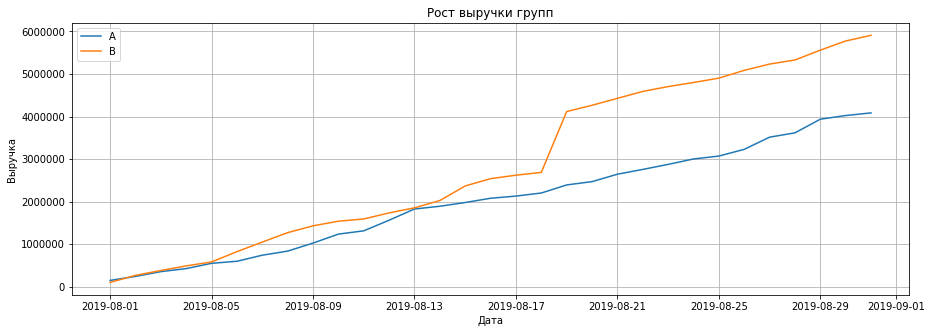

In [17]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue','transactions']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue','transactions']]
fig = plt.subplots(figsize=(15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Рост выручки групп')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid(True)
plt.legend()
plt.show()

Вначале группы идут ровно, на середине теста выручка B-группы сильно возрастает и к концу опять более менее ровно. Выброс может сигнализировать либо всплекс числа заказов, либо сделан очень дорогой заказ.

### Построим график кумулятивного среднего чека по группам.

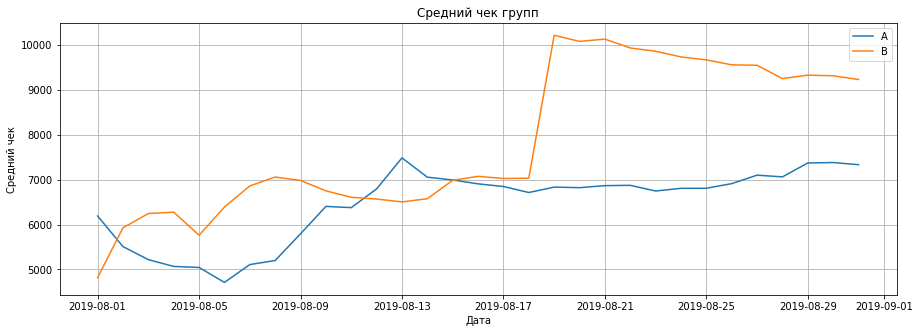

In [18]:
fig = plt.subplots(figsize=(15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['transactions'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['transactions'], label='B')
plt.title('Средний чек групп')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid(True)
plt.legend()
plt.show()

Средние чеки сравниваются к середине теста. И просходит тот самый выброс. Средний чек вырос, значит кто-то сделал очень большой заказ и из-за этого исказил данные. Средняя А продолжает немного расти, а средняя В начинает падать. Не видно на какой отметке они должны стабилизираться. Выброс сильно искажает данные. ВОзможно стоит очистить.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

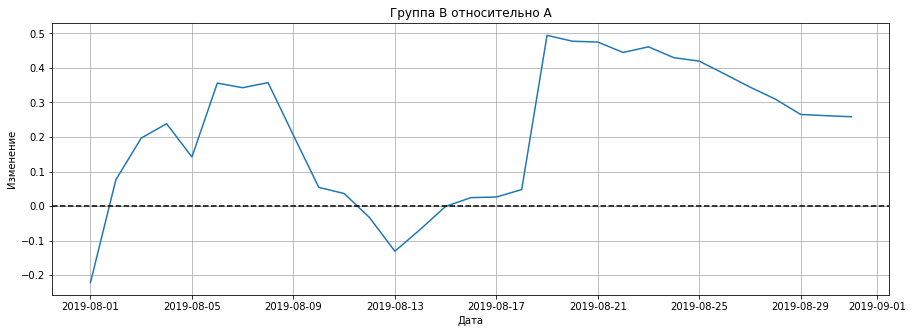

In [19]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date',\
                                                   how='left', suffixes=['A', 'B'])
fig = plt.subplots(figsize=(15, 5))
plt.plot(mergedCumulativeRevenue['date'],(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['transactionsB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['transactionsA'])-1)
plt.title('Группа B относительно А')
plt.xlabel('Дата')
plt.ylabel('Изменение')
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Та же самая картина. В начинает лидировать, к середине стабилизация и примерно паритет, выброс в группе А на 13 число ненадолго выводит А в лидеры и выброс в B искажает данные настолько, что средний чек B становится на 50% больше среднего чека A. К концу теста средние чеки стремемятся друг к другу(район около 0 на графике.)

### Построим график кумулятивной конверсии по группам.

In [20]:
cumulativeData['conversion'] = cumulativeData['transactions']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

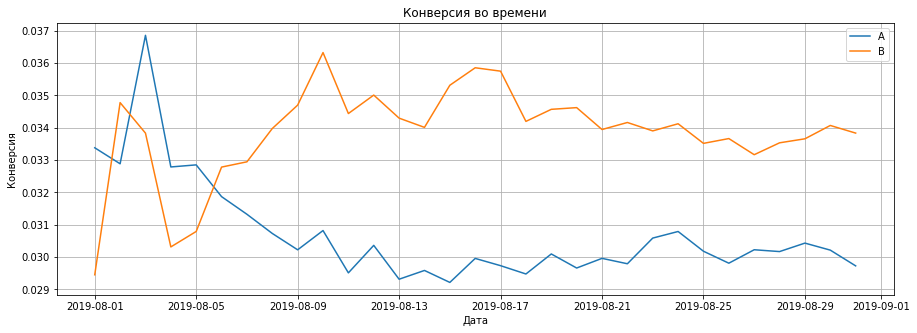

In [21]:
fig = plt.subplots(figsize=(15, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Конверсия во времени')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.grid(True)
plt.legend()
plt.show()

Конверсия А - примерно 3%, а группы В - 3,4%. Вроде бы в группе B покупают лучше A.

### График относительного изменения кумулятивной конверсии группы B к группе A.

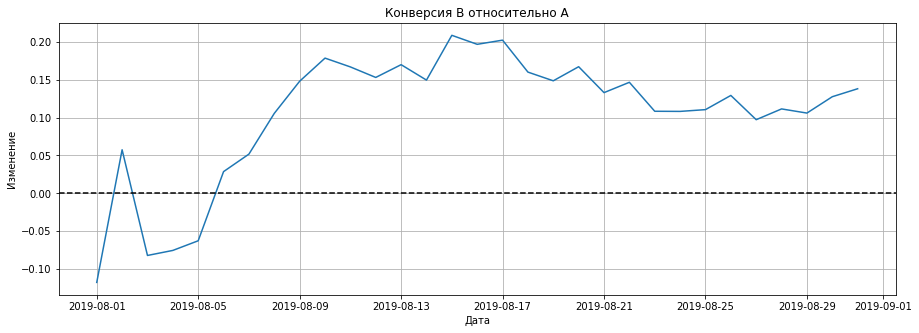

In [22]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
fig = plt.subplots(figsize=(15, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title('Конверсия B относительно А')
plt.xlabel('Дата')
plt.ylabel('Изменение')
plt.grid(True)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

К концу теста конверсия B выше на 10%-14% по неочищенным данным.

### Точечный график количества заказов по пользователям.

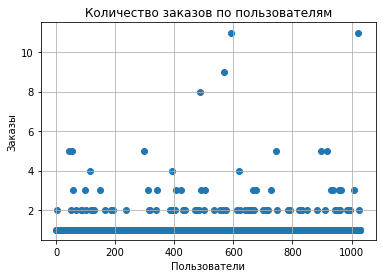

In [23]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsers.columns = ['visitor_id', 'transactions']
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['transactions']) 
plt.title('Количество заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Заказы')
plt.grid(True)
plt.show()

In [24]:
ordersByUsers['transactions'].describe()

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: transactions, dtype: float64

Большинство пользователей делает только 1 заказ. Есть небольшая доля с 2. Тех, кто делает больше 2 заказов уже единицы.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу.

In [25]:
np.percentile(ordersByUsers['transactions'], [95, 99])

array([2., 4.])

5% делали больше 2 заказов, и 1% больше 4. Таким образом границей можно считать 2 заказа, все что выше(5%) - аномалии.

### Точечный график стоимостей заказов.

In [26]:
orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

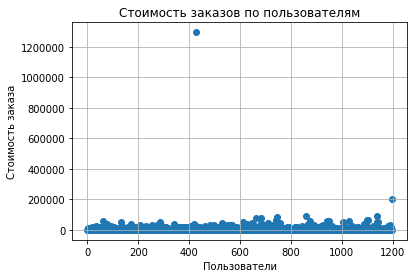

In [27]:
x_values2 = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values2, orders['revenue']) 
plt.title('Стоимость заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказа')
plt.grid(True)
plt.show()

Всего 2 заказы отбились от общей массы. Изменим масштаб.

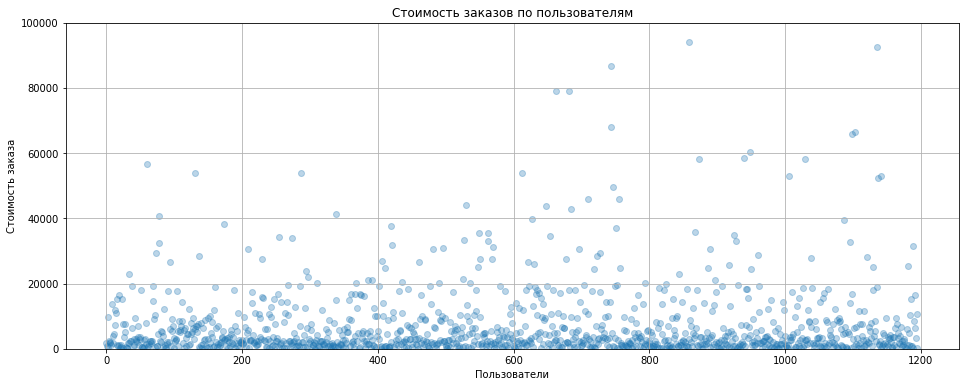

In [28]:
plt.figure(figsize=(16,6))
plt.scatter(x_values2, orders['revenue'],alpha=0.3)
plt.title('Стоимость заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказа')
plt.ylim([0, 100000])
plt.grid(True)
plt.show()

БОльшая часть находится в пределах 20000. Точные цифры укажут перцентили.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу.

In [29]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Только 5% заказов больше 28тысяч, 1% - более 58233.

### Посчитаем статистическую значимость различий в конверсии между группами по сырым данным.

In [30]:
ordersByUsersA = (orders[orders['group'] == 'A'].groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique}))
ordersByUsersA.columns = ['user_id', 'orders']
ordersByUsersB = (orders[orders['group'] == 'B'].groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique}))
ordersByUsersB.columns = ['user_id', 'orders']

In [31]:
ordersByUsers = (orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique}))

In [32]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [33]:
sampleA.unique()

array([1, 4, 2, 3, 5, 7, 0])

In [34]:
sampleB.unique()

array([1, 3, 2, 5, 6, 4, 0])

В предыдущих данных было известно, что какие-то пользователи сделали 11 заказов,но в `sampleA` и `sampleB` это не отражено. Интересно.

In [35]:
ordersByUsers['transaction_id'].unique()

array([ 1,  2,  5,  3,  4,  8,  9, 11])

In [36]:
ordersByUsers[ordersByUsers['transaction_id']== 11]

,visitor_id,transaction_id
591,2458001652,11
1023,4256040402,11


In [37]:
orders[orders['visitor_id']== 4256040402]

,transaction_id,visitor_id,date,revenue,group
60,1421016313,4256040402,2019-08-16,56650,B
114,1120327437,4256040402,2019-08-01,5800,A
187,2048878902,4256040402,2019-08-17,1550,A
253,1610091760,4256040402,2019-08-23,16950,A
263,2575861846,4256040402,2019-08-18,10970,B
588,3700356838,4256040402,2019-08-20,17650,A
873,2519737434,4256040402,2019-08-08,58220,B
901,3402467119,4256040402,2019-08-27,1630,A
1018,1415970216,4256040402,2019-08-31,5170,A
1019,453824282,4256040402,2019-08-31,1850,B


Теперь понятно в чем дело. Один и тот же пользователь состоит в обоих группах. Как раз 11 заказов. Причем 31 числа слелал два заказа и попал в разные группы. Наверняка с остальными пользователями тоже самое.

Вернёмся к выборкам. Посчитаем статистическую значимость различий в конверсии

In [38]:
print(st.mannwhitneyu(sampleA, sampleB)[1]) # p-value
print(sampleB.mean() / sampleA.mean() - 1) # насколько различны

0.008396177528376304
0.13807884655320146


p-value значительно меньше 5%. По сырым данным в конверсиях есть статистически значимые различия. А прирост конверсии группы B относительно группы A равен 13,8%. Нулевую гипотезу о равенстве отвергаем.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по сырым данным.

In [39]:
st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

0.3646454927716229

In [40]:
orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean()-1

0.2587136699126005

Здесь же P-value уже значительно больше 5%. Следовательно причин отвергать нулевую гипотезу и считать, что в средних чеках есть различия нет. Однако прирост среднего чека группы B составил 25.8%. Не исключено, что в группе B большие анамальные заказы, они и создали такой сильный прирост.

### Посчитаем статистическую значимость различий в конверсии между группами по очищенным данным.

Попробуем очистить данные от аномальных значений и посмотрим как изменятся результаты тестов.

95-й и 99-й перцентили средних чеков равны 28000 и 58233.2 рублям.

95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказам.

Уберем 5% пользователей, кто сделал заказ больше 28000 и 5%, кто сделал больше 2 заказов. Сделаем срезы и исключим их из наших данных.

Тут есть одно противоречие. Например, взять нашего пользователя с 11 заказами. Он делал как большие заказы больше 50000, так и маленькие. Таким образом, по первому критерию мы должны его 'очистить' вместе с данными маленьких заказов. Но по второму критерию, он сделал 7 заказов в группе A и 4 заказа в группе B и тоже должен быть 'очищен' полностью,т.к заказов больше 2.

Но допустим, есть некий пользователь в группе B с двумя заказами на 30000 и 3000. По первому критерию он должен быть 'очищен', а по второму нет. Таким образом, теряется заказ этого пользователя на 3000, хотя по логике он теряться не должен.

Поэтому первый критерий немного изменим. Просто удалим аномальные покупки, а уже потом отфильтруем от всех пользователей кто сделал больше 2 покупок.

В итоге мы получим, что аномальные пользозователи делали визиты на сайт, но как будто ничего не покупали.

In [41]:
orders_filtered = orders.query('revenue <= 28000').reset_index(drop=True)
ordersByUsersA_filtered = (orders_filtered[orders_filtered['group'] == 'A'].groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique}))
ordersByUsersA_filtered.columns = ['user_id', 'orders']
ordersByUsersA_filtered = ordersByUsersA_filtered.query('orders <=2').reset_index(drop=True)
ordersByUsersB_filtered = (orders_filtered[orders_filtered['group'] == 'B'].groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique}))
ordersByUsersB_filtered.columns = ['user_id', 'orders']
ordersByUsersB_filtered = ordersByUsersB_filtered.query('orders <=2').reset_index(drop=True)

In [42]:
sampleA_filtered = pd.concat([ordersByUsersA_filtered['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA_filtered['orders'])), name='orders')],axis=0).reset_index(drop=True)
sampleB_filtered = pd.concat([ordersByUsersB_filtered['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB_filtered['orders'])), name='orders')],axis=0).reset_index(drop=True)

In [43]:
print('Было')
print(st.mannwhitneyu(sampleA, sampleB)[1]) # было
print(sampleB.mean() / sampleA.mean() - 1)
print('Стало')
print(st.mannwhitneyu(sampleA_filtered, sampleB_filtered)[1]) # очищенные данные
print(sampleB_filtered.mean() / sampleA_filtered.mean() - 1)

Было
0.008396177528376304
0.13807884655320146
Стало
0.007571533738051045
0.17131954419144169


Результат не сильно изменился. P-value даже немного уменьшился, а относительная разница увеличилась.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по очищенным данным.

In [44]:
print('Было')
print(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])
print(orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean()-1)
print('Стало')
print(st.mannwhitneyu(orders_filtered[orders_filtered['group']=='A']['revenue'], orders_filtered[orders_filtered['group']=='B']['revenue'])[1])
print(orders_filtered[orders_filtered['group']=='B']['revenue'].mean() / orders_filtered[orders_filtered['group']=='A']['revenue'].mean()-1)

Было
0.3646454927716229
0.2587136699126005
Стало
0.4259370929702875
-0.016217981630632927


По средним чекам статистической значимости как не было, так и нет. После очистки от аномалий прирост среднего чека в +25,8% сменился на падение -1,6%.

In [45]:
# средние чеки
print('Было')
print(orders.query('group == "A"')['revenue'].mean())
print(orders.query('group == "B"')['revenue'].mean())
print('Стало')
print(orders_filtered.query('group == "A"')['revenue'].mean())
print(orders_filtered.query('group == "B"')['revenue'].mean())

Было
7333.578096947936
9230.875
Стало
5213.212806026366
5128.66501650165


Аномальные данные влияли на B группу слишком сильно. Всего 5% пользователей своими большими заказами увеличивали средний почти в 2 раза. После очистки средние чеки по группам практически сравнялись.

### Решение по результатам теста.

In [46]:
orders_days = orders_filtered.groupby(['date','group'])['revenue'].sum().reset_index()
visitors_days = visitors.groupby(['date','group'])['visitors'].sum().reset_index()
orders_days['cumulative_revenue'] = orders_days.groupby('group')['revenue'].cumsum()
orders_days = orders_days.pivot(index='date',columns='group',values=['revenue','cumulative_revenue'])
orders_days.columns = ['revenueA','revenueB','cumulative_revenueA','cumulative_revenueB']
orders_days.tail()

,revenueA,revenueB,cumulative_revenueA,cumulative_revenueB
date,,,,
2019-08-27,143345,61057,2395126,2657171
2019-08-28,101122,96008,2496248,2753179
2019-08-29,123675,121150,2619923,2874329
2019-08-30,86460,100513,2706383,2974842
2019-08-31,61833,133129,2768216,3107971


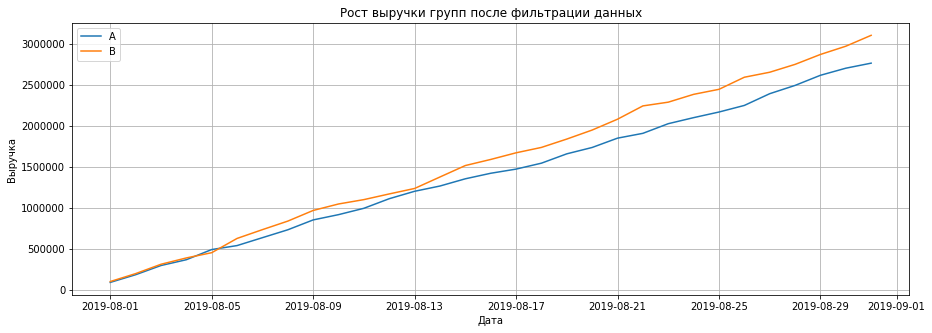

In [47]:
fig = plt.subplots(figsize=(15, 5))
plt.plot(orders_days['cumulative_revenueA'], label='A')
plt.plot(orders_days['cumulative_revenueB'], label='B')
plt.title('Рост выручки групп после фильтрации данных')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid(True)
plt.legend()
plt.show()

In [48]:
orders_filtered.groupby('group').agg({'visitor_id': 'nunique'})

,visitor_id
group,
A,479
B,557


**Итак, что можно сказать по результатам теста. Конверсия улучшилась на 17%, визитеры конвертируются в покупателей чаще, как по сырым данным, так и после фильтрации.**

**По среднему чеку нет статистически значимых различий. Сам средний чек практически не изменился.**

**Выручка у B-группы лучше, но и конвертнутых пользователей в В-группе больше. Оттого В-группа показала лушие результаты.**

**Получается после введения изменений----> Конверсия возросла ----> Пользователи стали чаще покупать ---> Рост выручки.
Но на средний чек изменения не повлияли.**

**Тест можно останавливать. Результаты можно считать позитивными.**
